# Polinomial regression

Trabajo realizado por

- Flores Tun, Jorge David
- Sanchez Soberanis, Felipe

Aprendizaje Automático, enero-mayo 2023

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

A diferencia de los modelos de predicción lineal simple, de acuerdo con las expresiones:

$$ 
    Y_i = (a + \beta X_i) + \epsilon _i
$$

onde:

- $\alpha$ = punto de corte en el eje de ordenadas

- $\beta$ = pendiente o gradiente de la recta, que son los coeficientes de regresión 

- $\epsilon _i$ corresponde al término de resíduos, que representa la diferencia entre el valor observado y el estimado para el individuo $i$.


Se puede ampliar el concepto lineal de regresión para extender el grado del modelo desde el cuadrático en adelante, generando un modelo de regresión polinomial:

$$
    Y = a + bX + cX ^ 2 + dX ^ 3...
$$

la potencialidad de este modelo es la capacidad de ajustar potencias mayores de $x$ y añadirlas al modelo, generando patrones y tipor únicos de curvaturas con respecto a la relación y/x.

Para este caso, es posible aplicar varios de los principios vistos en los problemas de regresión lineal, tales como la aplicación de los algoritmos de mínimos cuadrados y descenso del gradiente.


In [2]:
x_ex = np.linspace(0, 10, 21)
y_1 = 4 + 2 * x_ex - 0.1 * x_ex ** 2
y_2 = 4 + 2 * x_ex - 0.2 * x_ex ** 2
# 12 - 4x + 0.3x^2
y_3 = 12 - 4 * x_ex + 0.3 * x_ex ** 2
y_4 = 4 + 0.5 * x_ex + 0.1 * x_ex ** 2

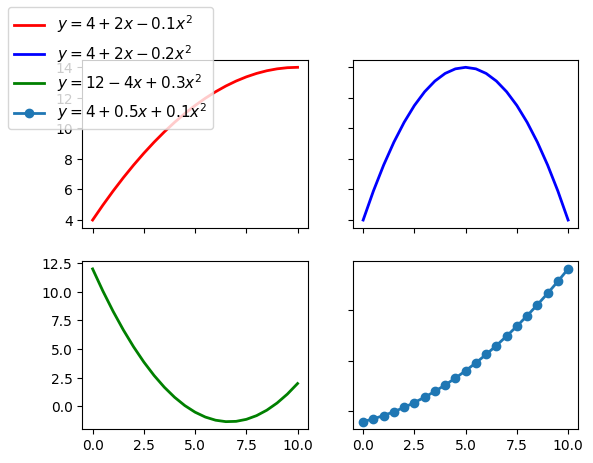

In [3]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2)
ax1.plot(x_ex[:], y_1[:], "r-", linewidth = 2, label = "$y = 4 + 2x -0.1x^2$")
ax2.plot(x_ex[:], y_2[:], "b-", linewidth = 2, label = "$y = 4 + 2x -0.2x^2$")
ax3.plot(x_ex[:], y_3[:], "g-", linewidth = 2, label = "$y = 12 - 4x + 0.3x^2$")
ax4.plot(x_ex[:], y_4[:], "o-", linewidth = 2, label = "$y = 4 + 0.5x +0.1x^2$")
fig.legend(loc = "upper left", fontsize = 11)

for ax in fig.get_axes():
    ax.label_outer()

Se observa que un simple modelo cuadrático con sólo tres parámetros puede describir un amplio rango de relaciones funcionales.

## Métodos empleados para solución de la regresión polinomial

### Mínimos cuadrados para regresión polinomial

Retomando la fórmula anterior que define un modelo polinómico:

$$
    Y = J(\theta) = \beta _0 + \beta _1 \theta + \beta _2 \theta ^ 2 + ... + \beta _n \theta ^ n + \epsilon
$$

y definiendo el error como

$$
    E = \frac{1}{2n} \sum_{i=1}^{m} (Y_i - (\beta _0 + \beta _1 \theta + \beta _2 \theta ^ 2 + ... + \beta _n \theta ^ n)) ^ 2
$$

Como el objetivo de este cálculo minimizar la cuenta de errores, se aplica difereniciación y simplificación con respecto a los coeficientes $\beta$:

$$
    \frac{\partial E}{\partial \theta _0} = 
        \frac{1}{2n} \sum (-2)(1)(Y_i - (\beta _0 + \beta _1 \theta + \beta _2 \theta ^ 2 + ... + \beta _n \theta ^ n))  
$$
$$
    \frac{\partial E}{\partial \theta _0} = 
        -2 \sum (Y_i - (\beta _0 + \beta _1 \theta + \beta _2 \theta ^ 2 +  ... + \beta _n \theta ^ n))
$$

Se realiza hasta obtener la diferenciación con respecto a la última constante $\beta _n$

$$
    \frac{\partial E}{\partial \theta _n} = 
        -2 \sum \theta ^n (Y_i - (\beta _0 + \beta _1 \theta + \beta _2 \theta ^ 2 + ... + \beta _n \theta ^ n))
$$


Para, entonces, encontrar el mínimo implica que su diferenciación el dicho punto será de cero, se expresión toma por tal para dar paso a una serie de ecuaciones que se resolverán por medio de métodos de álgebra lineal.
Al simplificar y distribuir para obtener un arreglo más acorde para los métodos se obtiene:

$$
    \beta _0 (m) + \beta _1 \sum \theta + \beta _2 \sum \theta ^2 + ... + \beta _n \sum \theta ^n = \sum Y_i
$$

$$
    \beta _0 \sum \theta + \beta _1 \sum \theta ^ 2 + \beta _2 \sum \theta ^ 3 + ... + \beta _n \sum \theta ^{n + 1} = \theta \sum Y_i
$$

$$
    ...
$$

$$
    \beta _0 \sum \theta ^ n + \beta _1 \sum \theta ^ {n + 1} + \beta _2 \sum \theta ^ {n + 2} + ... + \beta _n \sum \theta ^{2n} = \theta ^ n \sum Y_i
$$

Otra forma de representarlo es mediante matrices descomponiendo como resultado de una multiplicación matrivial y separando los coeficientes a encontrar:

$$
        \begin{bmatrix}
        m\beta _0 & \beta _1 \sum \theta & \beta _2 \sum \theta ^2 & ... & beta _n \sum \theta ^n \\
        \beta _0 \sum \theta & \beta _1 \sum \theta ^ 2 & \beta _2 \sum \theta ^ 3 & ... & \beta _n \sum \theta ^{n + 1} \\
        ... & ... & ... & ... & ... \\
        \beta _0 \sum \theta ^ n & \beta _1 \sum \theta ^ {n + 1} & \beta _2 \sum \theta ^ {n + 2} & ... & \beta _n \sum \theta ^{2n}
        \end{bmatrix}

        =

        \begin{bmatrix}
        \sum Y_i \\
        \theta \sum Y_i \\
        ...\\
        \theta ^ n \sum Y_i 
        \end{bmatrix}  
$$


$$
    \begin{bmatrix}
    m & \sum \theta & \sum \theta ^2 & ... & \sum \theta ^n \\
    \sum \theta & \sum \theta ^ 2 & \sum \theta ^ 3 & ... & \sum \theta ^{n + 1} \\
    ... & ... & ... & ... & ... \\
    \sum \theta ^ n & \sum \theta ^ {n + 1} & \sum \theta ^ {n + 2} & ... & \sum \theta ^{2n}
    \end{bmatrix}

    \begin{bmatrix}
    \beta _0 \\
    \beta _1 \\
    ... \\
    \beta _n 
    \end{bmatrix}

    =

    \begin{bmatrix}
    \sum Y_i \\
    \theta \sum Y_i \\
    ...\\
    \theta ^ n \sum Y_i 
    \end{bmatrix}
$$

Esto da como resultado una ecuacion de la forma $Ax = B$ donde
- A es la matriz $n \times n$
- B es la matriz que contiene valores estimados $ n \times 1 $
- x es la matriz variable, conteniendo todos los $\beta _ n$

En la librería numpy existe el siguiente método para resolver esta ecuacion y así determinar los coeficientes dle polinomio de grado n:

`C = np.linalg.solve(A,B)`

donde se entregará la matriz resultado $  n \times 1 $

### Ejemplo de regresión polinomial para un modelo de grado 2

Se tiene el siguiente caso para un modelo cuadrático y se aplicará el algoritmo de mínimos cuadrados.

In [4]:
m = 300
X = 10 * np.random.rand(m, 1)
x_real = np.linspace(0, 10, 31)
#y = 12 - 4 * x_ex + 0.3 * x_ex ** 2
y_real = 12 - 4 * x_real + 0.3 * x_real ** 2
y = 12 - 4 * X + 0.3 * X ** 2 + 0.95 * np.random.randn(m, 1)

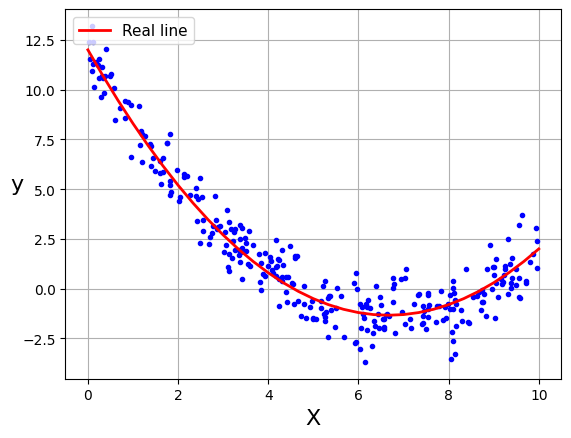

In [5]:
plt.plot(X, y, "b.")
plt.plot(x_real[:], y_real[:], "r-", linewidth = 2, label = "Real line")
plt.xlabel('X', fontsize = 16)
plt.ylabel('y', fontsize = 16, rotation = 0)
plt.legend(loc = "upper left", fontsize = 11)
plt.grid(True)
plt.show()

Asumiendo que este modelo, al parecerse lineal, puede reducirse mucho más el error con un modelo polinomial se usa el método de mínimos cuadrados.

Al representar este modelo, se entiende que el modelo respuesta tiene la siguiente forma:

$$
    Y = a_1 + a_2 X + a_3 X^2 + \epsilon
$$

Con análisis de error:

$$
    E = \frac{1}{2}\sum_{i = 1}^{n}(Y_i - (a_1 + a_2 X + a_3 X^2))^2
$$_

Con respectivas derivadas: 

$$
    \frac{\partial E}{\partial a} = -2 \sum (Y_i - a_1 - a_2 X - a_3 X^2)
$$

$$
    \frac{\partial E}{\partial b} = -2 \sum (Y_i X - a_1 X - a_2 X^2 - a_3 X^3)
$$

$$
    \frac{\partial E}{\partial c} = -2 \sum (Y_i X^2 - a_1 X^2 - a_2 X^3 - a_3 X^4)
$$

Encontrando el mínimo y simplificando la ecuación multivariable:

$$
    \begin{bmatrix}
    n & \sum X & \sum X^2 \\
    \sum X & \sum X^2 & \sum X^3 \\
    \sum X^2 & \sum X^3 & \sum X^4
    \end{bmatrix}
    
    \begin{bmatrix}
    a_1 \\
    a_2 \\
    a_3 
    \end{bmatrix}

    = 

    \begin{bmatrix}
    \sum Y_i \\
    X \sum Y_i \\
    X ^ 2 \sum Y_i 
    \end{bmatrix}
$$

Del cual n depende del número de datos en la nube de puntos.

El algoritmo desarrollado es el siguiente:

In [6]:
# Las demas variables como la lista de X y Y fueron establecidad con anterioridad

p = 2 #Representando el grado del polinomio
q = p + 1
r = len(X) #Sistema discreto e iteracion

x_it = np.array(np.reshape(X, len(X)).tolist())
y_it = np.array(np.reshape(y, len(y)).tolist())

# De la forma Ax = B
A = np.zeros(shape = (q, q), dtype = float)
B = np.zeros(q, dtype = float)

#Se aprovecha la simetria de la matriz A para simplificar el algoritmo
for i in range(0, q, 1):
    for j in range(0, i + 1 ,1):
        coeficiente = np.sum(x_it ** (i + j))
        A[i,j] = coeficiente
        A[j,i] = coeficiente
    B[i] = np.sum(y_it * (x_it ** i))

print(A)
print('\n\n')
print(B)


[[3.00000000e+02 1.53052107e+03 1.02162350e+04]
 [1.53052107e+03 1.02162350e+04 7.63716454e+04]
 [1.02162350e+04 7.63716454e+04 6.09158938e+05]]



[ 546.99859716  375.32705924 -723.34436264]


In [7]:
#Se resuelve y se asignan las constantes
C = np.linalg.solve(A,B)
a_1 = C[0]
a_2 = C[1]
a_3 = C[2]
print(C)

[12.00778418 -3.94823267  0.29242834]


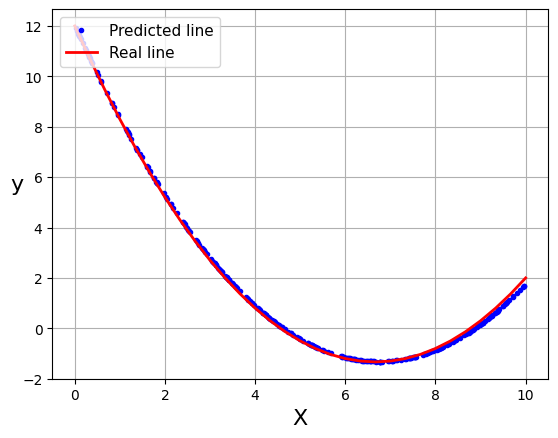

In [8]:
#Generacion de nueva ecuacion

y_predct = a_1 + a_2 * X + a_3 * X ** 2

plt.plot(X, y_predct, "b.", label = "Predicted line")
plt.plot(x_real[:], y_real[:], "r-", linewidth = 2, label = "Real line")
plt.xlabel('X', fontsize = 16)
plt.ylabel('y', fontsize = 16, rotation = 0)
plt.legend(loc = "upper left", fontsize = 11)
plt.grid(True)
plt.show()

### Otros métodos dentro de las herramientas de python 3

La librería numpy ofrece herramientas de aproximación de polinomios con el método `numpy.polyfit`, quien realiza su propipo algoritmo que entrega los coeficientes del modelo.

Del mismo modo, requiere del criterio humano para determinar el grado, pues no incluye una evaluación del mínimo error dada una serie de pruebas con diferentes grados polinomiales.

In [9]:
# Se recupera de nuevo los datos de x_ti y y_ti
x_it = np.array(np.reshape(X, len(X)).tolist())
y_it = np.array(np.reshape(y, len(y)).tolist())

C_2 = np.polyfit(x_it, y_it, 2)

print(C_2)

[ 0.29242834 -3.94823267 12.00778418]


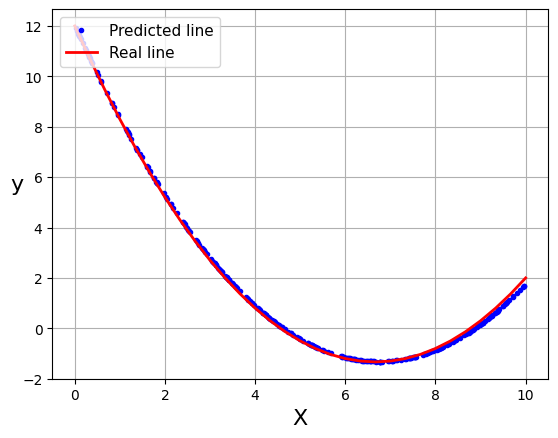

In [10]:
a_1 = C_2[2]
a_2 = C_2[1]
a_3 = C_2[0]

y_predct = a_1 + a_2 * X + a_3 * X ** 2

plt.plot(X, y_predct, "b.", label = "Predicted line")
plt.plot(x_real[:], y_real[:], "r-", linewidth = 2, label = "Real line")
plt.xlabel('X', fontsize = 16)
plt.ylabel('y', fontsize = 16, rotation = 0)
plt.legend(loc = "upper left", fontsize = 11)
plt.grid(True)
plt.show()

Se observa que la librería numpy usa el mísmo método de mínimos cuadrados para obtener el modelo de predicción